## Data Overview

In [16]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns
from sklearn import neighbors
from collections import Counter

In [25]:
bank = pd.read_csv("bank.csv", sep = ';')
display(bank.head())
display(bank.shape)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


(4521, 17)

## Data Cleaning and Preprocessing

In [27]:
bank = bank.dropna()
bank.shape

(4521, 17)

In [28]:
Counter(bank['job'])

Counter({'management': 969,
         'blue-collar': 946,
         'technician': 768,
         'admin.': 478,
         'services': 417,
         'retired': 230,
         'self-employed': 183,
         'entrepreneur': 168,
         'unemployed': 128,
         'housemaid': 112,
         'student': 84,
         'unknown': 38})

In [31]:
# Define jobs that bring income and jobs that don't bring income
jobs_bring_income = ['management', 'technician', 'admin.', 'retired', 'self-employed', 'entrepreneur', 'student']
jobs_dont_bring_income = ['blue-collar', 'services', 'unemployed', 'housemaid', 'unknown']

# Create dataframes based on jobs that bring income and don't bring income
bank_income = bank[bank['job'].isin(jobs_bring_income)]
bank_no_income = bank[bank['job'].isin(jobs_dont_bring_income)]

# Output the dataframes
print("Dataframe for jobs that bring income:")
display(bank_income.head())

print("\nDataframe for jobs that don't bring income:")
display(bank_no_income.head())

Dataframe for jobs that bring income:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no



Dataframe for jobs that don't bring income:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no
10,39,services,married,secondary,no,9374,yes,no,unknown,20,may,273,1,-1,0,unknown,no


In [32]:
# Define columns to convert to numeric
columns_to_numeric = ['marital', 'education', 'month', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']

# Convert specified columns to numeric
for column in columns_to_numeric:
    bank[column] = bank[column].astype('category').cat.codes
    
display(bank.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,services,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,management,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,management,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,blue-collar,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [35]:
# Statistical summary of the DataFrame
print(bank.describe())

               age      marital    education      default       balance  \
count  4521.000000  4521.000000  4521.000000  4521.000000   4521.000000   
mean     41.170095     1.147755     1.231365     0.016810   1422.657819   
std      10.576211     0.599650     0.748744     0.128575   3009.638142   
min      19.000000     0.000000     0.000000     0.000000  -3313.000000   
25%      33.000000     1.000000     1.000000     0.000000     69.000000   
50%      39.000000     1.000000     1.000000     0.000000    444.000000   
75%      49.000000     2.000000     2.000000     0.000000   1480.000000   
max      87.000000     2.000000     3.000000     1.000000  71188.000000   

           housing         loan      contact          day        month  \
count  4521.000000  4521.000000  4521.000000  4521.000000  4521.000000   
mean      0.566025     0.152842     0.652289    15.915284     5.540146   
std       0.495676     0.359875     0.901498     8.247667     3.002763   
min       0.000000     0.000

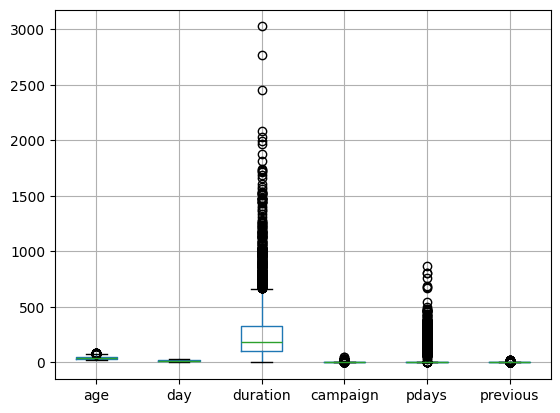

In [38]:
import matplotlib.pyplot as plt

# Box plot for numerical columns
bank.boxplot(column=['age', 'day', 'duration', 'campaign', 'pdays', 'previous'])
plt.show()